In [1]:
import pandas as pd

In [2]:
file_path="ipl_dataset.csv"

In [3]:
df=pd.read_csv(file_path)

In [4]:
print(df.head())

                                      full_scorecard  \
0  https://stats.espncricinfo.com/ci/engine/match...   
1  https://stats.espncricinfo.com/ci/engine/match...   
2  https://stats.espncricinfo.com/ci/engine/match...   
3  https://stats.espncricinfo.com/ci/engine/match...   
4  https://stats.espncricinfo.com/ci/engine/match...   

                         team1                  team2  team1_score  \
0          Chennai Super Kings  Kolkata Knight Riders        131.0   
1               Mumbai Indians         Delhi Capitals        177.0   
2  Royal Challengers Bangalore           Punjab Kings        205.0   
3         Lucknow Super Giants         Gujarat Titans        158.0   
4             Rajasthan Royals    Sunrisers Hyderabad        210.0   

   team2_score            toss_winner toss_choice    winner     margin  \
0        133.0  Kolkata Knight Riders       Field       KKR  6 wickets   
1        179.0         Delhi Capitals       Field  Capitals  4 wickets   
2        208.0      

In [5]:
print(df.isnull().sum())

full_scorecard       0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64


In [8]:
df['winner'].fillna('No Result',inplace=True)

C:\Users\U HRUSHIKESH KARTHIK\AppData\Local\Temp\ipykernel_2492\1246327413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['winner'].fillna('No Result',inplace=True)


In [9]:
import matplotlib.pyplot as plt

In [10]:
team_wins=df['winner'].value_counts()

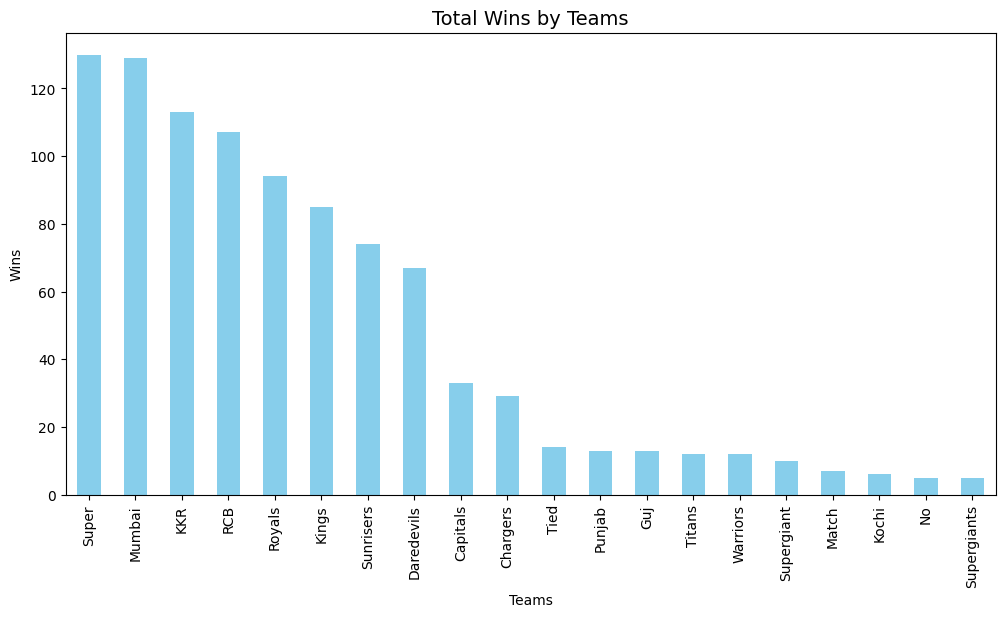

In [13]:
plt.figure(figsize=(12,6))
team_wins.plot(kind='bar',color='skyblue')
plt.title('Total Wins by Teams', fontsize=14)
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

#Toss Choice

In [14]:
toss_choices=df['toss_choice'].value_counts()

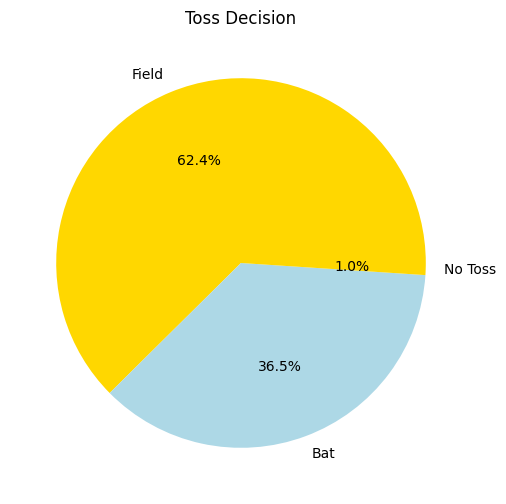

In [15]:
plt.figure(figsize=(6,6))
plt.pie(toss_choices,labels=toss_choices.index,autopct='%1.1f%%',colors=['gold','lightblue'])
plt.title("Toss Decision")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_enc= LabelEncoder()

In [19]:
df['team1_encoded']=label_enc.fit_transform(df['team1'])
df['team2_encoded']=label_enc.fit_transform(df['team2'])
df['venue_encoded']=label_enc.fit_transform(df['place'])   
df['winner_encoded']=label_enc.fit_transform(df['winner'])

In [21]:
x=df[['team1_encoded','team2_encoded','venue_encoded']]
y=df['winner_encoded']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

C:\Users\U HRUSHIKESH KARTHIK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [26]:
y_pred=model.predict(x_test)

In [27]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of model is: {accuracy:.2f}')

Accuracy of model is: 0.23


#CSK vs MI

In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define all possible teams and venues
teams = ["Chennai Super Kings", "Mumbai Indians", "Royal Challengers Bangalore", "Delhi Capitals", "Kolkata Knight Riders"]
venues = ["Mumbai", "Chennai", "Bangalore", "Delhi", "Kolkata"]

# Combine teams and venues into one list
all_labels = teams + venues  

# Fit LabelEncoder
label_enc = LabelEncoder()
label_enc.fit(all_labels)  # Ensure all possible values are included

# Test case
team1 = "Mumbai Indians"
team2 = "Royal Challengers Bangalore"
venue = "Mumbai"

# Convert to encoded values
team1_encoded = label_enc.transform([team1])[0]
team2_encoded = label_enc.transform([team2])[0]
venue_encoded = label_enc.transform([venue])[0]

# Simulate model prediction
model = lambda x: np.array([team1_encoded])  # Mock model that predicts team1 wins

# Make a prediction
prediction = model([[team1_encoded, team2_encoded, venue_encoded]])
predicted_winner = label_enc.inverse_transform(prediction)[0]

print(f"Predicted Winner: {predicted_winner}")


Predicted Winner: Mumbai Indians
